In [2]:
!pip install FOOOF --user

  Using cached fooof-1.0.0-py3-none-any.whl (112 kB)


In [6]:
tt = dot_output('outputs/eirs-tms-custom.output')
tt

In [36]:
gg = dot_conf('eirs-tms-custom.conf').run(params = {'Time' : 600, 'Oscillation Frequency' : 5.5})
ee = dot_conf('eirs-tms-custom.conf').run(params = {'Time' : 600, 'Oscillation Frequency' : 5})
ff = dot_conf('eirs-tms-custom.conf').run(params = {'Time' : 600, 'Oscillation Frequency' : 12})


# gg = dot_output('outputs/eirs-cadp-custom.output')
# gg = gg.df()

Replacing Time '550' with '600' -- Time: 600 Deltat: 0.0001

Replacing Oscillation Frequency '5' with '5.5' --    Bursts: 3 Burst Frequency: 50 Oscillation Frequency: 5.5 On: 2 Off: 8

Wrote 1 new conf files to: confs/
Replacing Time '550' with '600' -- Time: 600 Deltat: 0.0001

Replacing Oscillation Frequency '5' with '5' --    Bursts: 3 Burst Frequency: 50 Oscillation Frequency: 5 On: 2 Off: 8

Wrote 1 new conf files to: confs/
Replacing Time '550' with '600' -- Time: 600 Deltat: 0.0001

Replacing Oscillation Frequency '5' with '12' --    Bursts: 3 Burst Frequency: 50 Oscillation Frequency: 12 On: 2 Off: 8

Wrote 1 new conf files to: confs/


In [49]:
ggg = dot_conf('eirs-tms-custom.conf').run(params = {'Time' : 600, 'Bursts' : 3})
eee = dot_conf('eirs-tms-custom.conf').run(params = {'Time' : 600, 'Bursts' : 4})
fff = dot_conf('eirs-tms-custom.conf').run(params = {'Time' : 600, 'Bursts' : 5})

Replacing Time '550' with '600' -- Time: 600 Deltat: 0.0001

Replacing Bursts '3' with '3' --    Bursts: 3 Burst Frequency: 50 Oscillation Frequency: 5 On: 2 Off: 8

Wrote 1 new conf files to: confs/
Replacing Time '550' with '600' -- Time: 600 Deltat: 0.0001

Replacing Bursts '3' with '4' --    Bursts: 4 Burst Frequency: 50 Oscillation Frequency: 5 On: 2 Off: 8

Wrote 1 new conf files to: confs/
Replacing Time '550' with '600' -- Time: 600 Deltat: 0.0001

Replacing Bursts '3' with '5' --    Bursts: 5 Burst Frequency: 50 Oscillation Frequency: 5 On: 2 Off: 8

Wrote 1 new conf files to: confs/


In [52]:
np.corrcoef(ggg['pop.e.v'][450:], ff['pop.e.v'][450:])

array([[1.        , 0.99406072],
       [0.99406072, 1.        ]])

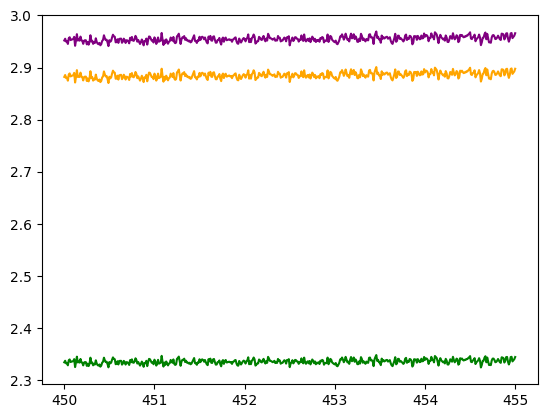

In [48]:
plt.plot(ee[['pop.e.q']][450:455], c = 'orange')
plt.plot(gg[['pop.e.q']][450:455], c = 'purple')
plt.plot(ff[['pop.e.q']][450:455], c = 'green')

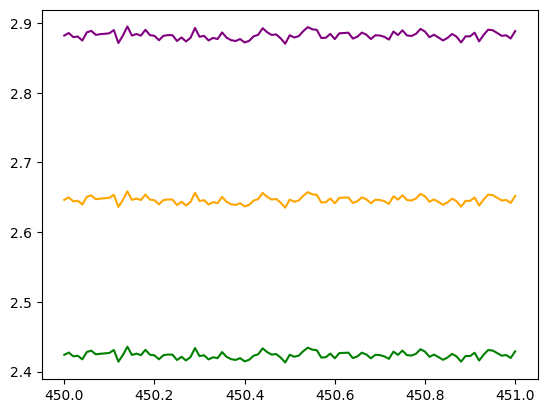

In [51]:
plt.plot(eee[['pop.e.q']][450:451], c = 'orange')
plt.plot(ggg[['pop.e.q']][450:451], c = 'purple')
plt.plot(fff[['pop.e.q']][450:451], c = 'green')

In [11]:
dot_conf('eirs-tms-custom.conf').run(params = {'Time' : 600, 'Oscillation Frequency' : 14})

gg = dot_output('outputs/eirs-tms-custom.output')
gg = gg.df()

Replacing Time '550' with '600' -- Time: 600 Deltat: 0.0001

Replacing Oscillation Frequency '5' with '14' --    Bursts: 3 Burst Frequency: 50 Oscillation Frequency: 14 On: 2 Off: 8

Wrote 1 new conf files to: confs/


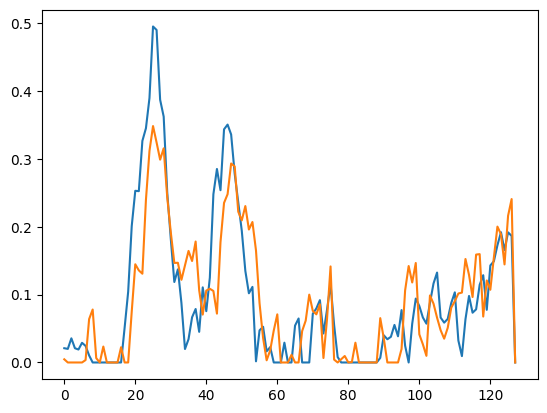

In [12]:
pre_stim = gg.loc[:tt.stim_onset - 10]
post_stim = gg.loc[tt.stim_onset +  tt.stim_duration + 110:]

welch_df = pre_post_PSD(pre_stim['pop.e.v'], post_stim['pop.e.v'], tt.sampling_rate)
welch_df = welch_df.drop(welch_df.index[0])
    

bins = np.array(welch_df.index)

pre_spectrum = welch_df[['pre_power']].values.flatten()
post_spectrum = welch_df[['post_power']].values.flatten()

freq_range = [bins.min(), bins.max()]



fm = FOOOF(aperiodic_mode='knee', verbose = False)

from fooof.sim.gen import gen_aperiodic


fm.fit(bins, pre_spectrum, freq_range)
ap_fit = gen_aperiodic(fm.freqs, fm._robust_ap_fit(fm.freqs, fm.power_spectrum))
init_flat_spec = fm.power_spectrum - ap_fit
pre_flat_spec = [max(0, x) for x in init_flat_spec] 
# fm.print_results()

fm.fit(bins, post_spectrum, freq_range)
ap_fit = gen_aperiodic(fm.freqs, fm._robust_ap_fit(fm.freqs, fm.power_spectrum))
init_flat_spec = fm.power_spectrum - ap_fit
post_flat_spec = [max(0, x) for x in init_flat_spec] 
# fm.print_results()

# fm.plot()


plt.plot(pre_flat_spec)
plt.plot(post_flat_spec)

# fm.get_params('peak_params')

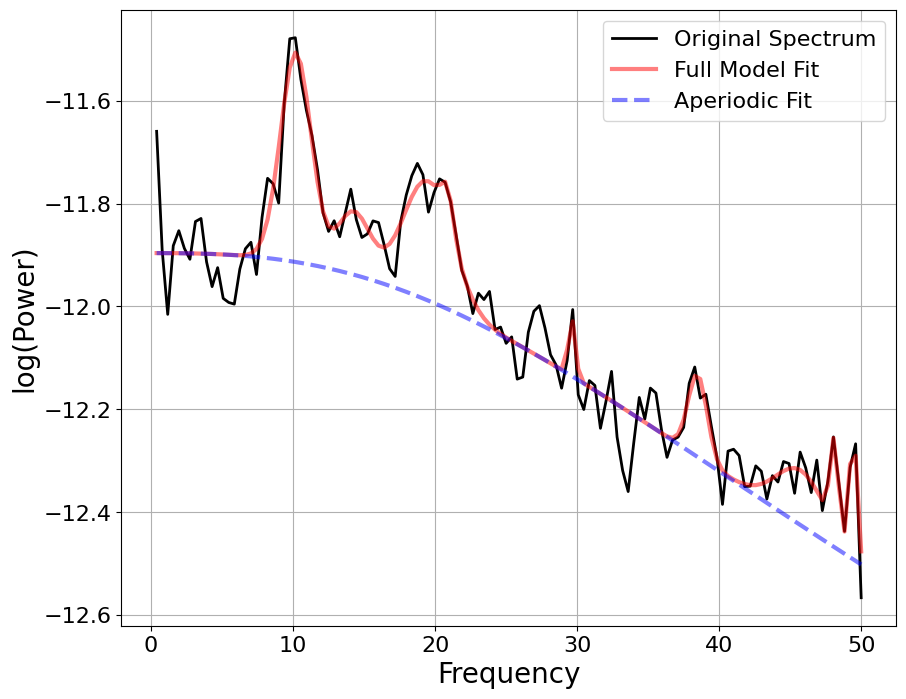

In [86]:
pre_stim = gg.loc[:tt.stim_onset - 10]
post_stim = gg.loc[tt.stim_onset +  tt.stim_duration + 110:]

welch_df = pre_post_PSD(pre_stim['pop.e.v'], post_stim['pop.e.v'], tt.sampling_rate)
welch_df = welch_df.drop(welch_df.index[0])
    

bins = np.array(welch_df.index)

pre_spectrum = welch_df[['pre_power']].values.flatten()
post_spectrum = welch_df[['post_power']].values.flatten()

freq_range = [bins.min(), bins.max()]



fm = FOOOF(aperiodic_mode='knee', verbose = False)

from fooof.sim.gen import gen_aperiodic


fm.fit(bins, pre_spectrum, freq_range)
ap_fit = gen_aperiodic(fm.freqs, fm._robust_ap_fit(fm.freqs, fm.power_spectrum))
init_flat_spec = fm.power_spectrum - ap_fit
pre_flat_spec = [max(0, x) for x in init_flat_spec] 


fm.fit(bins, post_spectrum, freq_range)
ap_fit = gen_aperiodic(fm.freqs, fm._robust_ap_fit(fm.freqs, fm.power_spectrum))
init_flat_spec = fm.power_spectrum - ap_fit
post_flat_spec = [max(0, x) for x in init_flat_spec] 

fm.plot()
# fm.print_results()
# fm.fooofed_spectrum_()



# plt.plot(pre_flat_spec)
# plt.plot(post_flat_spec)
# plt.plot(fm.power_spectrum)


# pre_fooof = fm.get_params('peak_params')
# pre_fooof

# fm.fit(bins, post_spectrum, freq_range)
# post_fooof = fm.get_params('peak_params')

# alpha_freq = 10
# pre_pwr = min(pre_fooof, key = lambda x: min(abs(i-alpha_freq) for i in x))[2]
# post_pwr = min(post_fooof, key = lambda x: min(abs(i-alpha_freq) for i in x))[2]

# FOOOF_AUC_diff = (pre_pwr-post_pwr)/(pre_pwr)

In [5]:
o = dot_conf('eirs-tms-custom.conf').run(params = {'Coupling 1' : .001532,
                                                   'Coupling 2' : -.009639}, gains = True)
o

(67, 'Coupling 1:  BCM - nu: 0.001200 nu_max: 1e-2 Dth: .25e-6 Pth: .45e-6 xyth: 1e-4 x: 2.3e-2 y: 2e-2 B: 30e3 glu_0: 200e-6 gNMDA: 2e-3 t_BCM: 7 t_rec: 1000\n')

(76, 'Coupling 10: BCM - nu: 0.001135 nu_max: 1e-2 Dth: .25e-6 Pth: .45e-6 xyth: 1e-4 x: 2.3e-2 y: 2e-2 B: 30e3 glu_0: 200e-6 gNMDA: 2e-3 t_BCM: 7 t_rec: 1000\n')

(77, 'Coupling 11: BCM - nu:-0.001222 nu_max:-1e-2 Dth: .25e-6 Pth: .45e-6 xyth: 1e-4 x: 2.3e-2 y: 2e-2 B: 30e3 glu_0: 200e-6 gNMDA: 2e-3 t_BCM: 7 t_rec: 1000\n')

(78, 'Coupling 12: Map - nu: 0.008222\n')

4 instances of Coupling 1. Select line number: 67
Replacing Coupling 1 '0.001200' with '0.001532' -- Coupling 1:  BCM - nu: 0.001532 nu_max: 1e-2 Dth: .25e-6 Pth: .45e-6 xyth: 1e-4 x: 2.3e-2 y: 2e-2 B: 30e3 glu_0: 200e-6 gNMDA: 2e-3 t_BCM: 7 t_rec: 1000

Replacing Coupling 2 '-0.009839' with '-0.009639' -- Coupling 2:  BCM - nu: -0.009639 nu_max: -1e-1 Dth: .25e-6 Pth: .45e-6 xyth: 1e-4 x: 2.3e-2 y: 2e-2 B: 30e3 glu_0: 200e-6 gNMDA: 2e-3 t_BCM: 7 t_rec: 1000

W

,ee,ei,es,ie,ii,is,re,rs,se,sr,g_ese,g_esre,g_srs,X,Y,Z,pop.e.v,propagator.ee.phi
5.01,3.053551,-19.212257,19.397623,3.053551,-19.212257,19.397623,0.560649,0.227396,1.848973,-1.990700,35.865682,-21.649400,-0.452678,0.151074,0.484174,0.039922,-0.001281,7.747103
5.02,3.060652,-19.256934,19.442731,3.060652,-19.256934,19.442731,0.560632,0.227389,1.854696,-1.996862,36.060352,-21.766228,-0.454065,0.151092,0.485289,0.040044,-0.001272,7.752022
5.03,3.052378,-19.204874,19.390169,3.052378,-19.204874,19.390169,0.560703,0.227418,1.861206,-2.003871,36.089089,-21.786349,-0.455717,0.151071,0.486280,0.040190,-0.001282,7.757726
5.04,3.048880,-19.182868,19.367950,3.048880,-19.182868,19.367950,0.560812,0.227462,1.850914,-1.992790,35.848410,-21.645239,-0.453284,0.151063,0.484230,0.039975,-0.001287,7.752272
5.05,3.044674,-19.156408,19.341235,3.044674,-19.156408,19.341235,0.560824,0.227467,1.849276,-1.991027,35.767284,-21.596714,-0.452893,0.151052,0.483883,0.039941,-0.001292,7.748332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549.96,1.790606,-11.985364,12.106909,1.714662,-11.596891,11.679886,1.046788,0.458629,0.679798,-0.731898,8.230250,-9.275607,-0.335670,0.137894,-0.060271,0.029603,-0.004849,3.073270
549.97,1.786996,-11.961187,12.082487,1.711376,-11.574661,11.657497,1.046875,0.458670,0.676662,-0.728521,8.175757,-9.214962,-0.334151,0.137873,-0.060097,0.029469,-0.004857,3.072789
549.98,1.779880,-11.913543,12.034360,1.705014,-11.531617,11.614145,1.046904,0.458684,0.676744,-0.728610,8.144178,-9.179622,-0.334202,0.137830,-0.060098,0.029473,-0.004872,3.068020
549.99,1.778758,-11.906021,12.026762,1.704151,-11.525771,11.608258,1.047145,0.458792,0.680020,-0.732137,8.178438,-9.220359,-0.335898,0.137824,-0.060432,0.029623,-0.004875,3.060323


In [266]:
o[['X', 'Y', 'Z']][:15].mean()

X    0.151052
Y    0.484231
Z    0.039889
dtype: float64

In [9]:
%%time
from SynPy import *

#--Run Options--#
conf_dir = os.path.join(os.getcwd(), 'confs/')
output_dir = os.path.join(os.getcwd(), 'outputs/')


grid_dir_name = 'bursts_oscillation_hr/'
new_conf_dir = os.path.join(conf_dir, grid_dir_name)
new_output_dir = os.path.join(output_dir, grid_dir_name)

# Run 
params = { # Replaces each dictionary key with the corresponding value in the .conf
    'Onset:': 150,
    'Duration:': 200,
    'Time:' : 600
}

perm_dict = {'Bursts' : [2,20,1],
             'Oscillation' : [1,20,1]}


CPU times: user 97 µs, sys: 0 ns, total: 97 µs
Wall time: 104 µs


In [17]:
dot_conf('eirs-tms-custom.conf').gen_confs(perm_dict, new_conf_dir, params)

Replacing Onset: '150' with '150' --  Stimulus: Burst - Onset: 150 Duration: 200 Amplitude: 100 Width: .5e-3

Replacing Duration: '200' with '200' --  Stimulus: Burst - Onset: 150 Duration: 200 Amplitude: 100 Width: .5e-3

Replacing Time: '550' with '600' -- Time: 600 Deltat: 0.0001

Replacing Bursts '3' with '2' --    Bursts: 2 Burst Frequency: 50 Oscillation Frequency: 5 On: 2 Off: 8

Replacing Oscillation '5' with '1' --    Bursts: 2 Burst Frequency: 50 Oscillation Frequency: 1 On: 2 Off: 8

Replacing Bursts '2' with '2' --    Bursts: 2 Burst Frequency: 50 Oscillation Frequency: 1 On: 2 Off: 8

Replacing Oscillation '1' with '2' --    Bursts: 2 Burst Frequency: 50 Oscillation Frequency: 2 On: 2 Off: 8

Replacing Bursts '2' with '2' --    Bursts: 2 Burst Frequency: 50 Oscillation Frequency: 2 On: 2 Off: 8

Replacing Oscillation '2' with '3' --    Bursts: 2 Burst Frequency: 50 Oscillation Frequency: 3 On: 2 Off: 8

Replacing Bursts '2' with '2' --    Bursts: 2 Burst Frequency: 50 Osci

Wrote 380 new conf files to: /gpfs/fs0/scratch/j/johngrif/kadak/code/tms-plasticity-modelling-backup/tms-plasticity-modelling/SynPy/confs/bursts_oscillation_hr/


380

In [11]:
# new_output_dir = '/gpfs/fs0/scratch/j/johngrif/kadak/code/tms-plasticity-modelling-backup/tms-plasticity-modelling/working/outputs/bursts_oscillation_hr/'
grid = list_files(new_output_dir, full_path = True, extension_filter = '.output')

xyz_gainer = pd.DataFrame()

for count, g in tqdm(enumerate(grid)):
    
    output = dot_output(g)
    gains = output.df(gains=True)
    
    pre_stim = gains.loc[:output.stim_onset - 10]
    post_stim = gains.loc[output.stim_onset +  output.stim_duration + 110:]
    
    row = gains.loc[output.time - 10:output.time].mean()
    row.name = output.f_name  # set the row index label directly using `.name`
    xyz_gainer = xyz_gainer.append(row)  # assign the result of `append` back to `xyz_gainer`
    
    if count == 0:
        row = gains.loc[output.write_start + 5:output.write_start + 15].mean()
        xyz_init = pd.Series(row)
        
    
    xyz_gainer.loc[output.f_name, 'V_AUC_delta'] = AUC_power_delta(pre_stim['pop.e.v'], 
                                                                   post_stim['pop.e.v'],
                                                                   output.sampling_rate,
                                                                   fooof_correct = False)
    
#     xyz_gainer.loc[output.f_name, 'V_AUC_FOOOF'] = AUC_power_delta(pre_stim['pop.e.v'], 
#                                                                    post_stim['pop.e.v'],
#                                                                    output.sampling_rate,
#                                                                    fooof_correct = True)
    
    xyz_gainer.loc[output.f_name, 'phi_AUC_delta'] = AUC_power_delta(pre_stim['propagator.ee.phi'], 
                                                                     post_stim['propagator.ee.phi'],
                                                                     output.sampling_rate,
                                                                     fooof_correct = False)
    
#     xyz_gainer.loc[output.f_name, 'phi_AUC_FOOOF'] = AUC_power_delta(pre_stim['propagator.ee.phi'], 
#                                                                      post_stim['propagator.ee.phi'],
#                                                                      output.sampling_rate,
#                                                                      fooof_correct = True)


xyz_gainer_tms = xyz_gainer
xyz_gainer_tms

1463it [1:14:41,  3.06s/it]


,X,Y,Z,ee,ei,es,g_ese,g_esre,g_srs,ie,ii,is,pop.e.v,propagator.ee.phi,re,rs,se,sr,V_AUC_delta,phi_AUC_delta
eirs-tms-custom_PERM_[bur=2_osc=1.0].output,0.107781,0.344421,0.021296,0.944278,-7.761065,7.677690,8.575900,-4.829729,-0.241481,1.898143,-12.227880,12.340922,-0.004781,3.128180,0.523083,0.200799,1.116990,-1.202603,0.183945,0.044928
eirs-tms-custom_PERM_[bur=2_osc=1.5].output,0.107665,0.328916,0.021269,0.940763,-7.737903,7.654656,8.326410,-4.759238,-0.241169,1.864897,-12.070362,12.181113,-0.004951,2.992834,0.530893,0.205928,1.087758,-1.171131,0.160494,0.084245
eirs-tms-custom_PERM_[bur=2_osc=1.25].output,0.107554,0.331318,0.021460,0.939825,-7.738163,7.655619,8.407868,-4.808271,-0.243332,1.875893,-12.117309,12.229183,-0.004852,3.070619,0.531166,0.205788,1.098261,-1.182439,0.183553,0.074159
eirs-tms-custom_PERM_[bur=2_osc=1.75].output,0.107865,0.302328,0.022177,0.935635,-7.674120,7.590530,8.016374,-4.734476,-0.251471,1.827889,-11.844884,11.952895,-0.005011,2.946100,0.548557,0.221161,1.056102,-1.137049,0.179671,0.135846
eirs-tms-custom_PERM_[bur=2_osc=2.0].output,0.108159,0.300689,0.022477,0.943035,-7.718961,7.634300,8.055328,-4.765422,-0.254873,1.833673,-11.901731,12.010401,-0.004987,2.964422,0.549473,0.224356,1.055149,-1.136023,0.191141,0.141280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eirs-tms-custom_PERM_[bur=20_osc=19.0].output,0.098999,0.077078,0.026059,0.757318,-6.649745,6.596140,4.878249,-4.114388,-0.295490,1.653801,-10.808980,10.928449,-0.007195,1.664333,0.788063,0.373325,0.739561,-0.791507,0.010307,0.671442
eirs-tms-custom_PERM_[bur=20_osc=19.5].output,0.098999,0.077078,0.026059,0.757318,-6.649745,6.596140,4.878249,-4.114388,-0.295490,1.653801,-10.808980,10.928449,-0.007195,1.664333,0.788063,0.373325,0.739561,-0.791507,0.010307,0.671442
eirs-tms-custom_PERM_[bur=20_osc=19.25].output,0.098999,0.077078,0.026059,0.757318,-6.649745,6.596140,4.878249,-4.114388,-0.295490,1.653801,-10.808980,10.928449,-0.007195,1.664333,0.788063,0.373325,0.739561,-0.791507,0.010307,0.671442
eirs-tms-custom_PERM_[bur=20_osc=19.75].output,0.098999,0.077078,0.026059,0.757318,-6.649745,6.596140,4.878249,-4.114388,-0.295490,1.653801,-10.808980,10.928449,-0.007195,1.664333,0.788063,0.373325,0.739561,-0.791507,0.010307,0.671442


In [12]:
non_phys_protocols = xyz_gainer_tms[xyz_gainer['V_AUC_delta'] == xyz_gains_d.loc['eirs-tms-custom_PERM_[bur=20_osc=20.0].output']['V_AUC_delta']].index
xyz_gains_d = xyz_gains_d.drop(set(xyz_gainer.index).intersection(non_phys_protocols))
xyz_gains_d['ppb'] = np.array(xyz_gains.index.str.extract(r'\[bur=(\d+)').astype(int))
xyz_gains_d['osc'] = np.array(xyz_gains.index.str.extract(r'osc=([+-]?\d*\.\d+|\d+\.\d*)').astype(float))

xyz_gains_d

,X,Y,Z,ee,ei,es,g_ese,g_esre,g_srs,ie,...,pop.e.v,propagator.ee.phi,re,rs,se,sr,V_AUC_delta,phi_AUC_delta,ppb,osc
eirs-tms-custom_PERM_[bur=2_osc=1.0].output,0.107781,0.344421,0.021296,0.944278,-7.761065,7.677690,8.575900,-4.829729,-0.241481,1.898143,...,-0.004781,3.128180,0.523083,0.200799,1.116990,-1.202603,0.183945,0.044928,2,1.00
eirs-tms-custom_PERM_[bur=2_osc=1.5].output,0.107665,0.328916,0.021269,0.940763,-7.737903,7.654656,8.326410,-4.759238,-0.241169,1.864897,...,-0.004951,2.992834,0.530893,0.205928,1.087758,-1.171131,0.160494,0.084245,2,1.50
eirs-tms-custom_PERM_[bur=2_osc=1.25].output,0.107554,0.331318,0.021460,0.939825,-7.738163,7.655619,8.407868,-4.808271,-0.243332,1.875893,...,-0.004852,3.070619,0.531166,0.205788,1.098261,-1.182439,0.183553,0.074159,2,1.25
eirs-tms-custom_PERM_[bur=2_osc=1.75].output,0.107865,0.302328,0.022177,0.935635,-7.674120,7.590530,8.016374,-4.734476,-0.251471,1.827889,...,-0.005011,2.946100,0.548557,0.221161,1.056102,-1.137049,0.179671,0.135846,2,1.75
eirs-tms-custom_PERM_[bur=2_osc=2.0].output,0.108159,0.300689,0.022477,0.943035,-7.718961,7.634300,8.055328,-4.765422,-0.254873,1.833673,...,-0.004987,2.964422,0.549473,0.224356,1.055149,-1.136023,0.191141,0.141280,2,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eirs-tms-custom_PERM_[bur=20_osc=1.5].output,0.109322,0.166505,0.027975,1.021349,-8.342576,8.259862,7.700625,-5.651578,-0.317216,2.003828,...,-0.005689,2.467980,0.682910,0.316607,0.932295,-1.001922,0.078500,0.340374,20,1.50
eirs-tms-custom_PERM_[bur=20_osc=1.25].output,0.108844,0.166518,0.027514,0.952040,-7.746847,7.654739,6.988561,-5.077640,-0.311982,1.933510,...,-0.005917,2.325153,0.675865,0.317876,0.912972,-0.981459,0.112608,0.437362,20,1.25
eirs-tms-custom_PERM_[bur=20_osc=1.75].output,0.106320,0.110068,0.030915,0.982589,-8.241792,8.170307,7.052570,-5.678758,-0.350544,1.895968,...,-0.005807,2.392968,0.749183,0.377846,0.863195,-0.927743,0.113555,0.407575,20,1.75
eirs-tms-custom_PERM_[bur=20_osc=2.0].output,0.104239,0.078610,0.035031,0.987231,-8.470827,8.402293,6.871235,-5.831001,-0.397220,1.805189,...,-0.005847,2.368181,0.789932,0.452144,0.817781,-0.878529,0.138237,0.438844,20,2.00


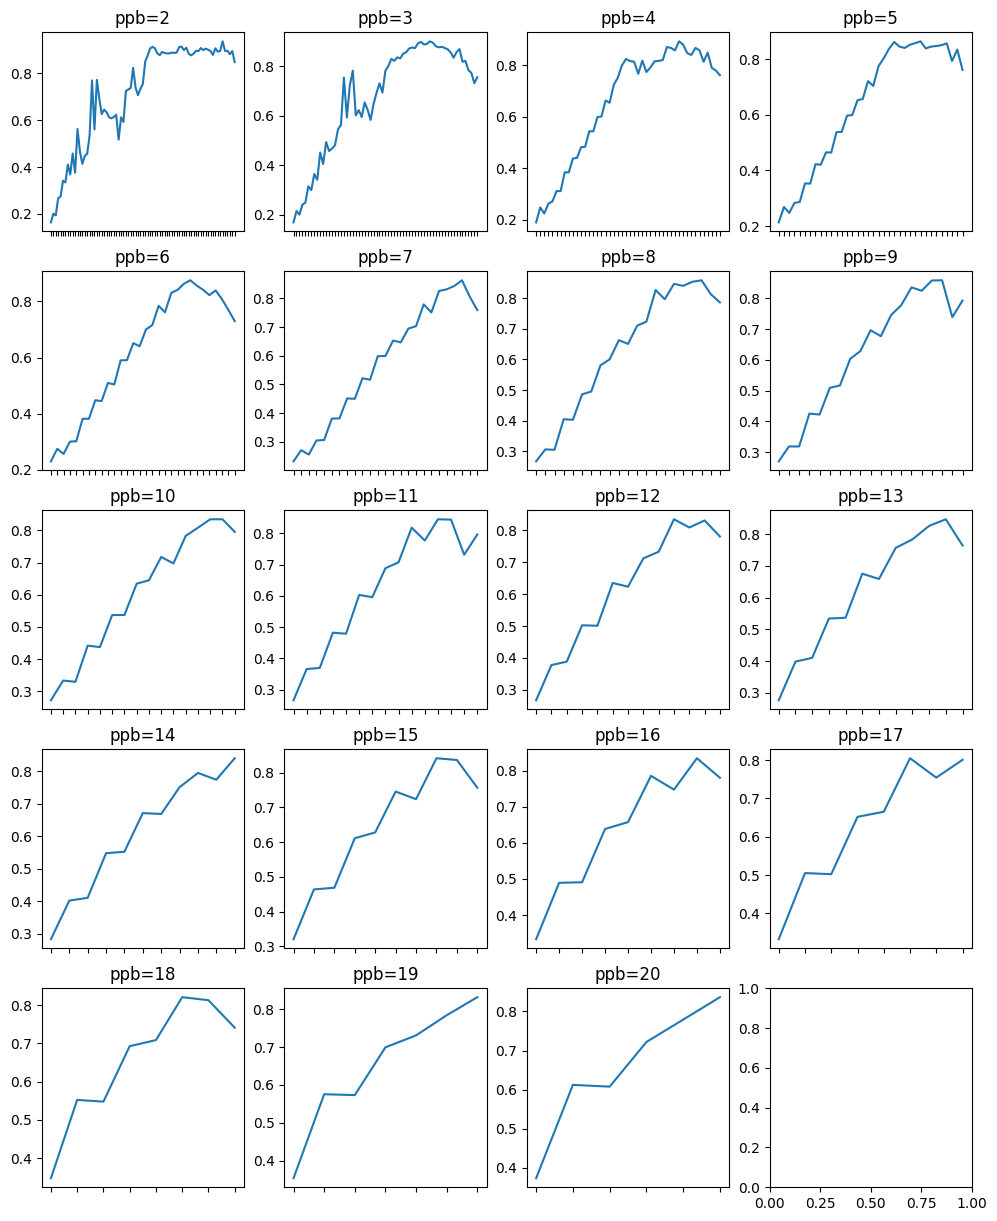

In [454]:
ppb_values = xyz_gains['ppb'].unique()
num_rows = (len(ppb_values) + 3) // 4
num_cols = min(len(ppb_values), 4)

# create the figure and subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 3*num_rows))

for i, ppb in enumerate(ppb_values):
    
    row_index = i // num_cols
    col_index = i % num_cols
    
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    
    
    dv = xyz_gains['theta_sign'][xyz_gains['ppb'] == ppb]
    iv = np.array([float(re.findall(r'osc=([+-]?\d*\.\d+|\d+\.\d*)', key)[0]) for key in dv.index])

    slope, intercept, _, _, _ = stats.linregress(iv, dv.values)

    #     # calculate fitted line
    fitted_line = slope*iv + intercept

    #     # subtract fitted line from original column to obtain de-trended column
    data = pd.Series(dv)
    detrended_data = data - fitted_line
    
    
    ax.plot(data)
    ax.set_xticklabels([])
#     ax.axhline(y=0, color='green', linestyle='--')
    
    ax.set_title(f'ppb={ppb}')
    
plt.show()

In [434]:
import statsmodels.formula.api as smf
xyz_gains['xy_interaction'] = xyz_gains['X'] * xyz_gains['Y']

# fit linear regression model with interaction effect
model = smf.ols(formula='V_AUC_delta ~ X + Y + xy_interaction', data=xyz_gains).fit()

# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            V_AUC_delta   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     89.05
Date:                Wed, 03 May 2023   Prob (F-statistic):           8.68e-45
Time:                        21:58:51   Log-Likelihood:                 410.32
No. Observations:                 432   AIC:                            -812.6
Df Residuals:                     428   BIC:                            -796.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.0895      0.540     -9.

In [436]:
import statsmodels.api as sm

# define predictors and response variables
X = xyz_gains[['X', 'Y']]
y = xyz_gains['V_AUC_delta']

# fit multiple linear regression model
X = sm.add_constant(X) # add constant term
model = sm.OLS(y, X).fit()

# print model summary
print(model.summary())

# predict DV for new values of IVs
new_data = pd.DataFrame({'X': [new_value_1], 'Y': [new_value_2]})
new_data = sm.add_constant(new_data) # add constant term
predicted_DV = model.predict(new_data)
print('Predicted DV:', predicted_DV)


                            OLS Regression Results                            
Dep. Variable:            V_AUC_delta   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     118.2
Date:                Thu, 04 May 2023   Prob (F-statistic):           1.30e-41
Time:                        15:28:40   Log-Likelihood:                 400.37
No. Observations:                 432   AIC:                            -794.7
Df Residuals:                     429   BIC:                            -782.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9276      0.251    -11.675      0.0

NameError: name 'new_value_1' is not defined

In [288]:
def distance_coefficient(x_point, y_point, z_point):
    delta_x = x_point - xyz_init['X']  # origin is (0, 0)
    delta_y = y_point - xyz_init['Y']
    delta_z = z_point - xyz_init['Z']
    distance = np.sqrt(delta_x**2 + delta_y**2 + delta_z**2)
    return distance


def theta_xy(x_pre, x_post, y_pre, y_post):
    x_delta = (x_post - x_pre) / x_pre
    y_delta = (y_post - y_pre) / y_pre
    theta_sign = x_delta - y_delta
    return theta_sign
    

# xyz_gains['Y_displacement'] = xyz_gains.apply(lambda row: distance_coefficient(0, row['Y'], 0), axis=1)
# xyz_gains['XY_displacement'] = xyz_gains.apply(lambda row: distance_coefficient(row['X'], row['Y'], 0), axis=1)
# xyz_gains['XYZ_displacement'] = xyz_gains.apply(lambda row: distance_coefficient(row['X'], row['Y'], row['Z']), axis=1)

xyz_gains['theta_sign'] = xyz_gains.apply(lambda row: theta_xy(xyz_init['X'], row['X'], xyz_init['Y'], row['Y']), axis=1)

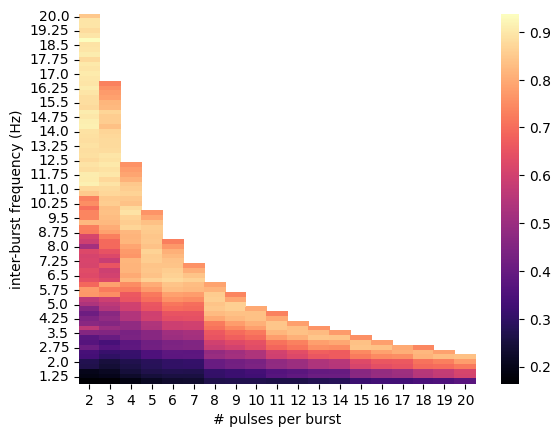

In [292]:
heatmap_dict = {}
for key, value in xyz_gains['theta_sign'].to_dict().items():
    bur, osc = re.findall(r'bur=(\d+)_osc=([+-]?\d*\.\d+|\d+\.\d*)', key)[0]
    heatmap_dict[(int(bur), float(osc))] = value

heatmap_df = pd.Series(heatmap_dict).unstack()
heatmap_df.index.names = ['# pulses per burst']
heatmap_df.columns.names = ['inter-burst frequency (Hz)']
heatmap_df = heatmap_df.iloc[:,::-1].T

sns.heatmap(heatmap_df, cmap = 'magma')

    
plt.show()

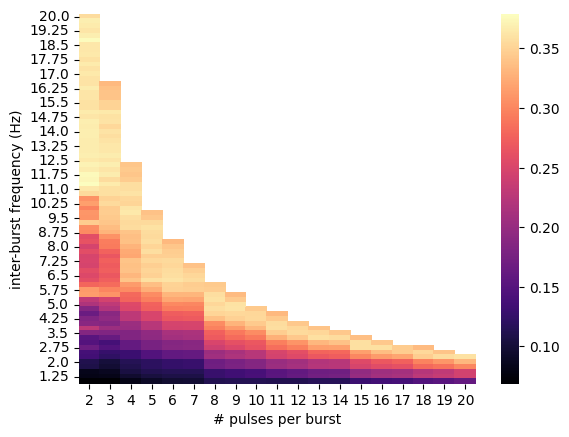

In [275]:
heatmap_dict = {}
for key, value in xyz_gains['XY_displacement'].to_dict().items():
    bur, osc = re.findall(r'bur=(\d+)_osc=([+-]?\d*\.\d+|\d+\.\d*)', key)[0]
    heatmap_dict[(int(bur), float(osc))] = value

heatmap_df = pd.Series(heatmap_dict).unstack()
heatmap_df.index.names = ['# pulses per burst']
heatmap_df.columns.names = ['inter-burst frequency (Hz)']
heatmap_df = heatmap_df.iloc[:,::-1].T

sns.heatmap(heatmap_df, cmap = 'magma')

    
plt.show()

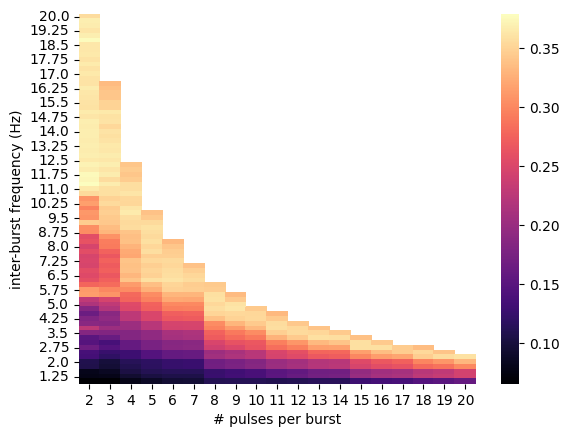

In [160]:
heatmap_dict = {}
for key, value in xyz_gains['XYZ_displacement'].to_dict().items():
    bur, osc = re.findall(r'bur=(\d+)_osc=([+-]?\d*\.\d+|\d+\.\d*)', key)[0]
    heatmap_dict[(int(bur), float(osc))] = value

heatmap_df = pd.Series(heatmap_dict).unstack()
heatmap_df.index.names = ['# pulses per burst']
heatmap_df.columns.names = ['inter-burst frequency (Hz)']
heatmap_df = heatmap_df.iloc[:,::-1].T

sns.heatmap(heatmap_df, cmap = 'magma')

    
plt.show()

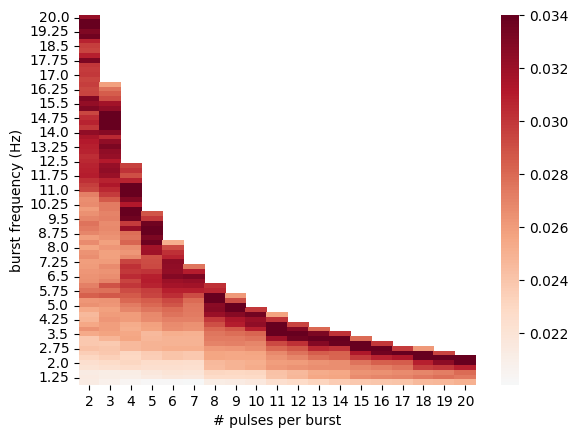

In [263]:
heatmap_dict = {}
for key, value in xyz_gains['Z'].to_dict().items():
    bur, osc = re.findall(r'bur=(\d+)_osc=([+-]?\d*\.\d+|\d+\.\d*)', key)[0]
    heatmap_dict[(int(bur), float(osc))] = value
    
heatmap_df = pd.Series(heatmap_dict).unstack()
heatmap_df.index.names = ['# pulses per burst']
heatmap_df.columns.names = ['burst frequency (Hz)']
heatmap_df = heatmap_df.iloc[:,::-1].T

sns.heatmap(heatmap_df, cmap = 'RdBu_r', center= xyz_init['Z'], vmax = .034)

    
plt.show()

In [258]:
xyz_init['Z']

0.020130433797244947

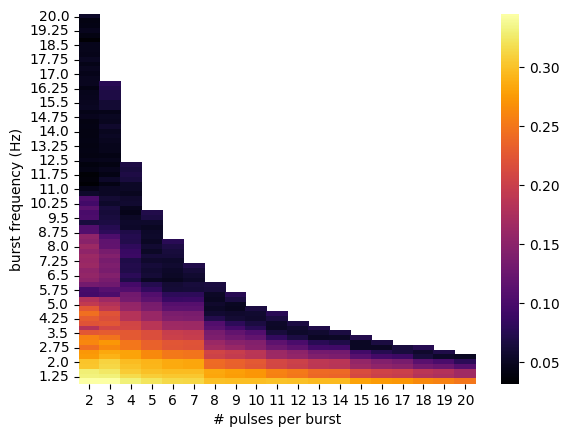

In [190]:
heatmap_dict = {}
for key, value in xyz_gains['Y'].to_dict().items():
    bur, osc = re.findall(r'bur=(\d+)_osc=([+-]?\d*\.\d+|\d+\.\d*)', key)[0]
    heatmap_dict[(int(bur), float(osc))] = value

heatmap_df = pd.Series(heatmap_dict).unstack()
heatmap_df.index.names = ['# pulses per burst']
heatmap_df.columns.names = ['burst frequency (Hz)']
heatmap_df = heatmap_df.iloc[:,::-1].T

sns.heatmap(heatmap_df, cmap = 'inferno')

    
plt.show()

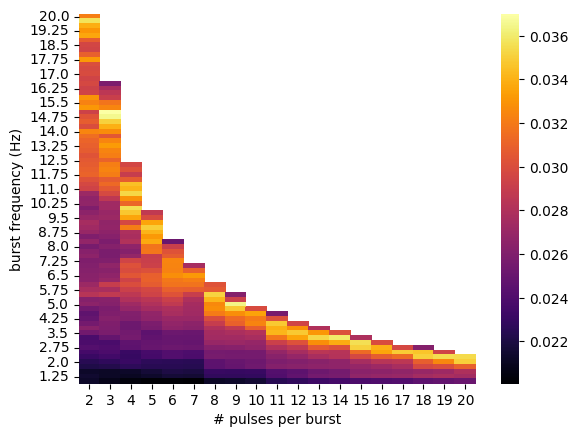

In [192]:
heatmap_dict = {}
for key, value in xyz_gains['Z'].to_dict().items():
    bur, osc = re.findall(r'bur=(\d+)_osc=([+-]?\d*\.\d+|\d+\.\d*)', key)[0]
    heatmap_dict[(int(bur), float(osc))] = value

heatmap_df = pd.Series(heatmap_dict).unstack()
heatmap_df.index.names = ['# pulses per burst']
heatmap_df.columns.names = ['burst frequency (Hz)']
heatmap_df = heatmap_df.iloc[:,::-1].T

sns.heatmap(heatmap_df, cmap = 'inferno')

    
plt.show()

In [ ]:
xyz_gains['num_pulses_administered'] = [dot_output() xyz_gains.index]
xyz_gains

In [16]:
from scipy.stats import pearsonr

print(pearsonr(xyz_gains['ppb'], xyz_gains['X']))
print(pearsonr(xyz_gains['ppb'], xyz_gains['Y']))
print(pearsonr(xyz_gains['ppb'], xyz_gains['Z']))
print()
print(pearsonr(xyz_gains['osc'], xyz_gains['X']))
print(pearsonr(xyz_gains['osc'], xyz_gains['Y']))
print(pearsonr(xyz_gains['osc'], xyz_gains['Z']))
print()
print()
print(pearsonr(xyz_gains['ppb'], xyz_gains['V_AUC_delta']))
print(pearsonr(xyz_gains['osc'], xyz_gains['V_AUC_delta']))
print()
print()
print(pearsonr(xyz_gains['X'], xyz_gains['V_AUC_delta']))
print(pearsonr(xyz_gains['Y'], xyz_gains['V_AUC_delta']))
print(pearsonr(xyz_gains['Z'], xyz_gains['V_AUC_delta']))

(-0.2048551860068688, 1.7779764726985e-05)
(0.08466768742919993, 0.0787741203038652)
(0.09103874405880082, 0.058671073935479934)

(-0.007737724891280781, 0.8725959061303208)
(-0.6692299047814372, 1.9827238526051462e-57)
(0.5074663683850574, 1.184817704022015e-29)


(-0.685287138572317, 3.42340475154794e-61)
(0.5361530965469296, 1.6113025668164204e-33)


(0.36565534660769616, 4.110257627308983e-15)
(-0.3325206551740576, 1.3014423864398516e-12)
(0.18631780950027518, 9.800224834468675e-05)


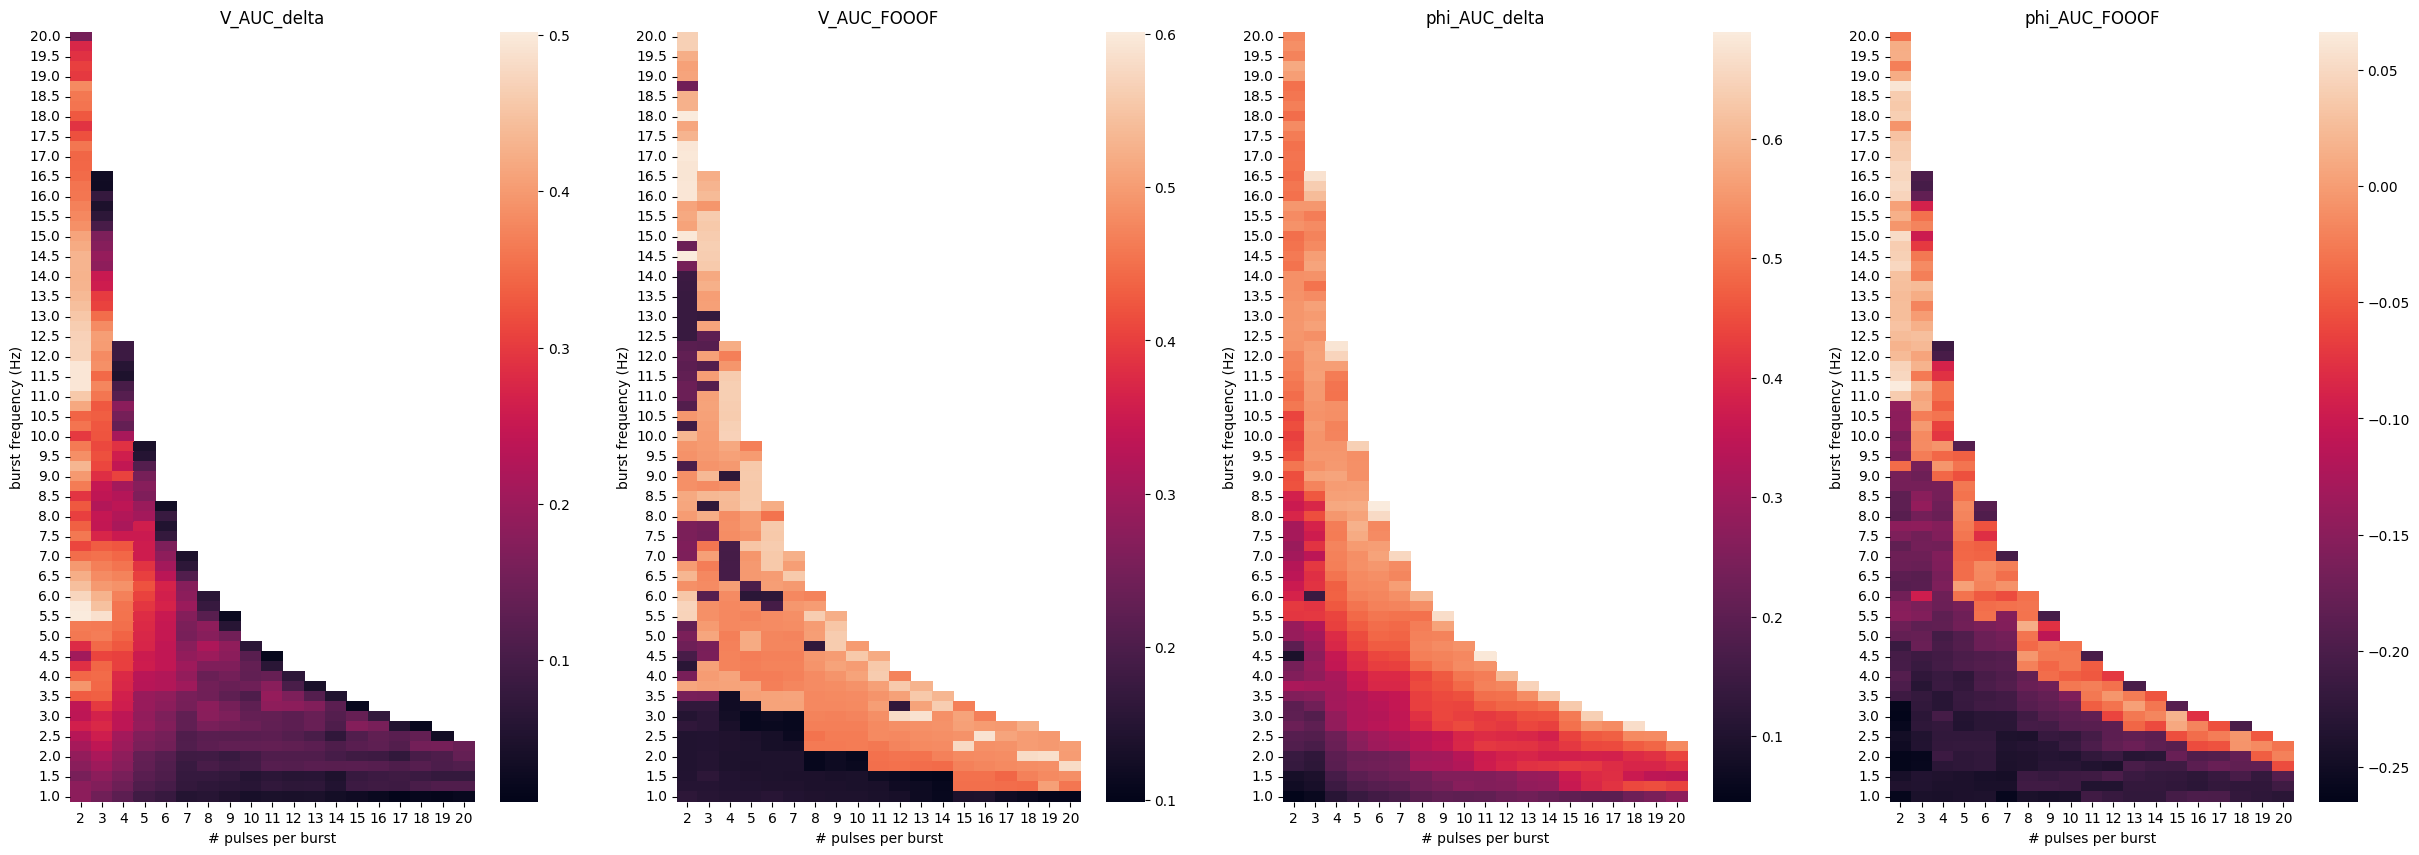

In [7]:
heatmaps = {}
for d in ('V_AUC_delta', 'V_AUC_FOOOF', 'phi_AUC_delta', 'phi_AUC_FOOOF'):
    heatmap_dict = {}
    for key, value in xyz_gains[d].to_dict().items():
        bur, osc = re.findall(r'bur=(\d+)_osc=([+-]?\d*\.\d+|\d+\.\d*)', key)[0]
        heatmap_dict[(int(bur), float(osc))] = value

    heatmap_df = pd.Series(heatmap_dict).unstack()
    heatmap_df.index.names = ['# pulses per burst']
    heatmap_df.columns.names = ['burst frequency (Hz)']
    heatmap_df = heatmap_df.iloc[:,::-1].T
    heatmaps[d] = heatmap_df 

fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (30, 10))

for i, (name, h) in enumerate(heatmaps.items()):
    sns.heatmap(h, ax=ax[i])
    ax[i].set_title(name)
    
plt.show()

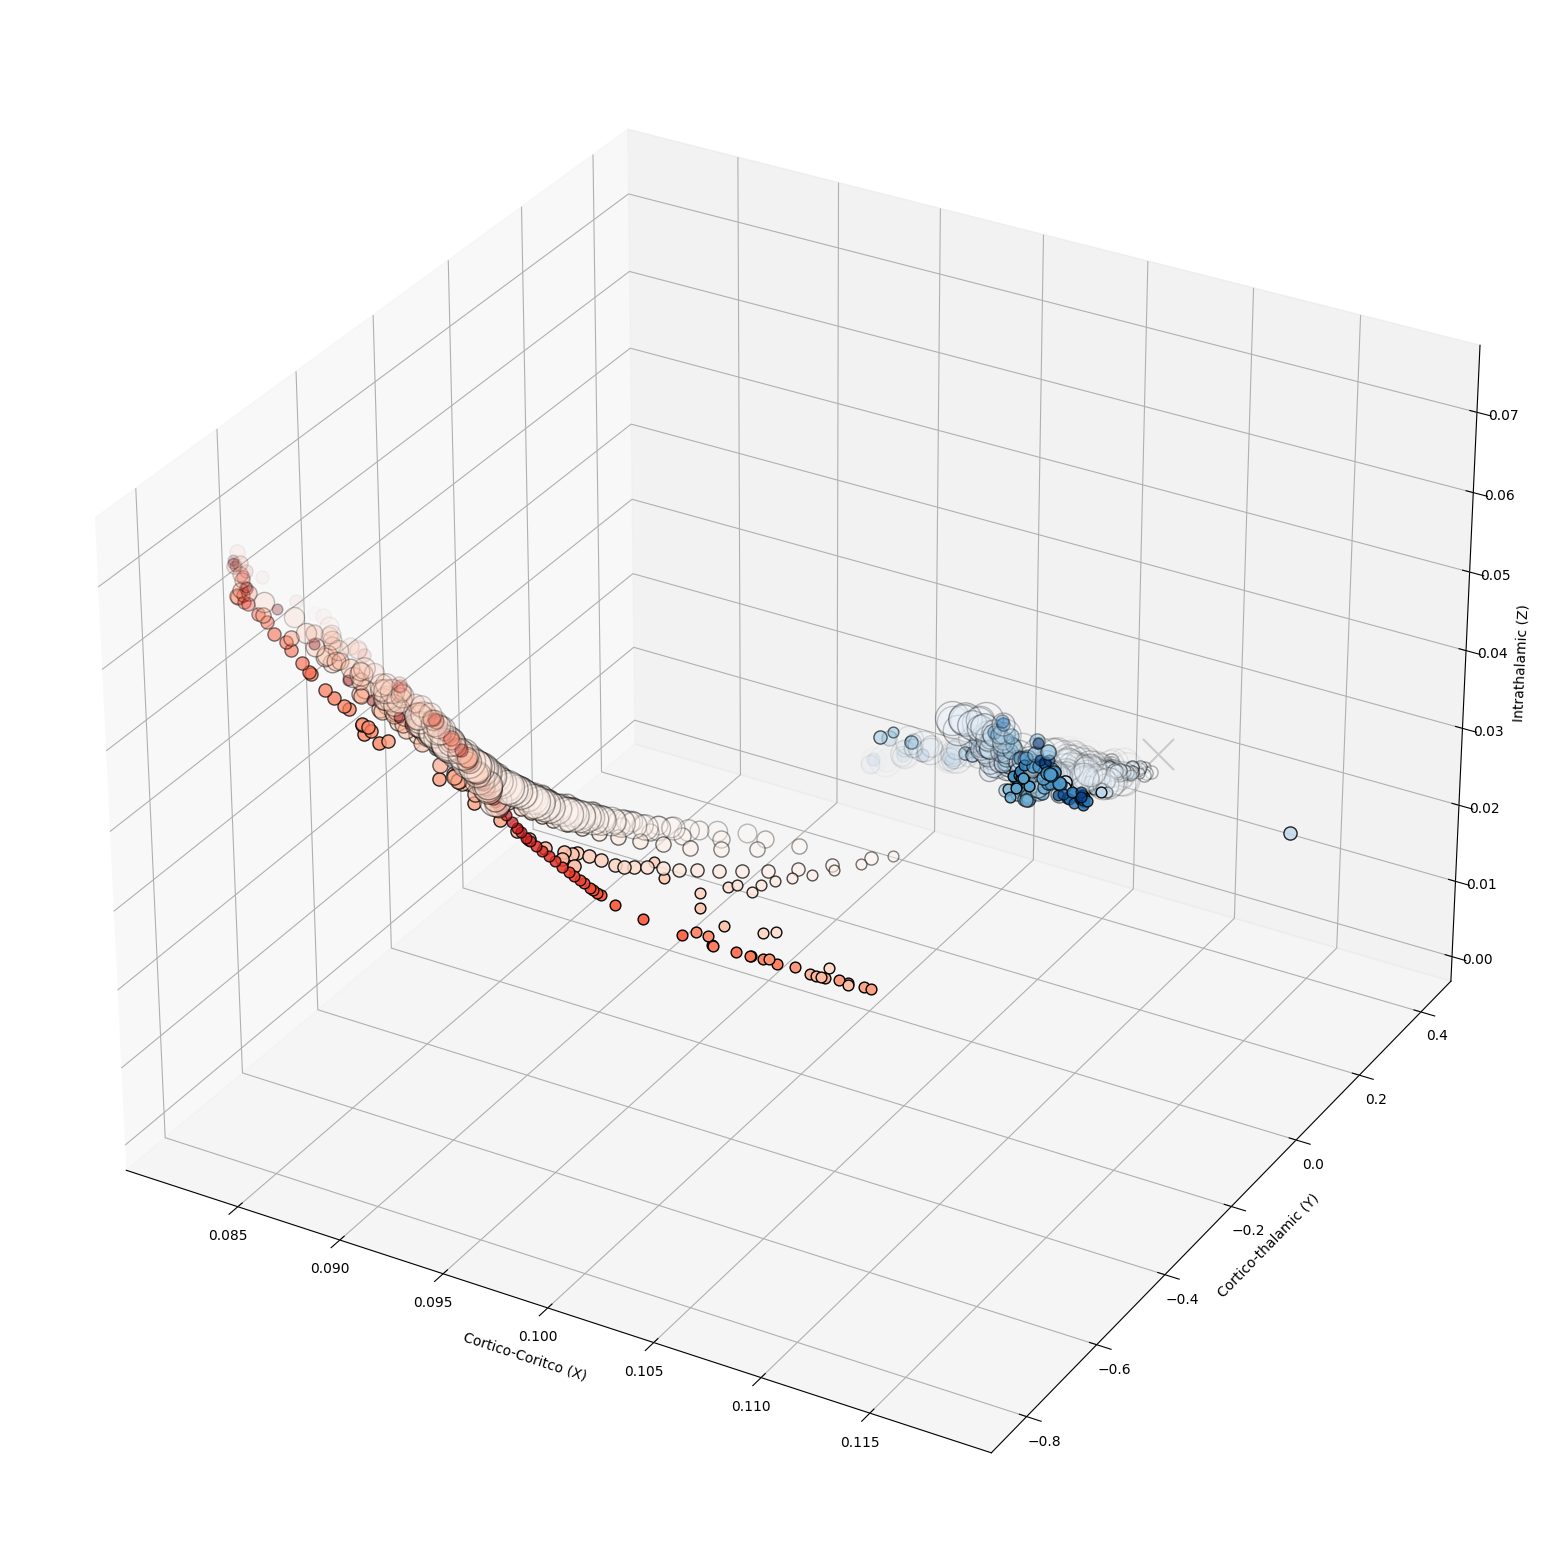

In [15]:
import matplotlib.cm as cm
# Create a 3D scatterplot
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Create a list of colors for each data point based on the cluster number
# colors = [cluster_colors[c] for c in xyz_gains['cluster']]

# Create a 3D scatterplot with colors based on the cluster number
X, Y, Z = xyz_gains['X'], xyz_gains['Y'], xyz_gains['Z']
ppb = xyz_gains['ppb']
osc = xyz_gains['osc']

AUC_delta = xyz_gains['V_AUC_delta']
alpha = np.array([(a - min(AUC_delta)) / (max(AUC_delta) - min(AUC_delta)) for a in AUC_delta])

colormap = cm.get_cmap('Reds')
norm_sizes = [(s - min(osc)) / (max(osc) - min(osc)) for s in osc]
colors = [colormap(ns) for ns in norm_sizes]

def scatters(X, Y, Z, s, c, al, edgecolors = 'black', marker = 'o'):
    ax.scatter(X, Y, Z, 
               s=s, 
               c=c,
               edgecolors=edgecolors,
               marker=marker,
               alpha=al)
    
#     ax.scatter(X, Y, 0, 
#                s=s, 
#                c=c,
#                edgecolors=edgecolors,
#                marker=marker,
#                alpha=al)

#     ax.scatter(X, .45, Z, 
#                s=s, 
#                c=c,
#                edgecolors=edgecolors,
#                marker=marker,
#                alpha=al)

#     ax.scatter(.095, Y, Z, 
#                s=s, 
#                c=c,
#                edgecolors=edgecolors,
#                marker=marker,
#                alpha=al)
    
    
for x,y,z,pb,cl, al in zip(X, Y, Z, ppb, colors, alpha):
#     if x, y, z == xyz_gains.loc['eirs-tms-custom_PERM_[bur=3_osc=5.0].output'][['X', 'Y', 'Z']]
#         scatters(x, y, z, 1000, 'hotpink', alpha, marker = 'X')
    scatters(x, y, z, s = pb*30, c = cl, al = al, edgecolors = 'black', marker = 'o')

X, Y, Z = xyz_gains_d['X'], xyz_gains_d['Y'], xyz_gains_d['Z']
ppb = xyz_gains_d['ppb']
osc = xyz_gains_d['osc']
    
AUC_delta = xyz_gains_d['V_AUC_delta']
alpha = np.array([(a - min(AUC_delta)) / (max(AUC_delta) - min(AUC_delta)) for a in AUC_delta])

colormap = cm.get_cmap('Blues')
norm_sizes = [(s - min(osc)) / (max(osc) - min(osc)) for s in osc]
colors = [colormap(ns) for ns in norm_sizes]
    
    
for x,y,z,pb,cl, al in zip(X, Y, Z, ppb, colors, alpha):
#     if x, y, z == xyz_gains.loc['eirs-tms-custom_PERM_[bur=3_osc=5.0].output'][['X', 'Y', 'Z']]
#         scatters(x, y, z, 1000, 'hotpink', alpha, marker = 'X')
    scatters(x, y, z, s = pb*30, c = cl, al = al, edgecolors = 'black', marker = 'o')

# scatters(X, Y, Z, osc, colors, alpha, edgecolors = 'black')

# standard_x, standard_y, standard_z = xyz_gains.loc['eirs--custom_PERM_[bur=3_osc=5.0].output'][['X', 'Y', 'Z']]
# scatters(standard_x, standard_y, standard_z, 1000, 'hotpink', al = .6, marker = 'X')

init_x, init_y, init_z = xyz_init[['X', 'Y', 'Z']]
scatters(init_x, init_y, init_z, 500, 'silver', al = .8, marker = 'x')





# Add labels and a colorbar
ax.set_xlabel('Cortico-Coritco (X)')
ax.set_ylabel('Cortico-thalamic (Y)')
ax.set_zlabel('Intrathalamic (Z)')
# ax.set_title('Post-stimulation CT gain in XYZ space\nMarker size denotes extent of alpha AUC suppression (larger = more suppressed)')

# Add a legend
# Create a custom legend based on the cluster_colors dictionary
# unique_clusters = cluster_colors.keys()
# legend_elements = []

# legend_elements.append(Line2D([0], [0], marker='s', color='green', label=f'Pre-stim.', markersize=10))
    

# for cluster in unique_clusters:
#     color = cluster_colors[cluster]
#     legend_elements.append(Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', 
#                                    markerfacecolor=color, markersize=10))
    

# Add the legend
# ax.legend(handles=legend_elements, loc='upper right', title='Clusters')

plt.show()

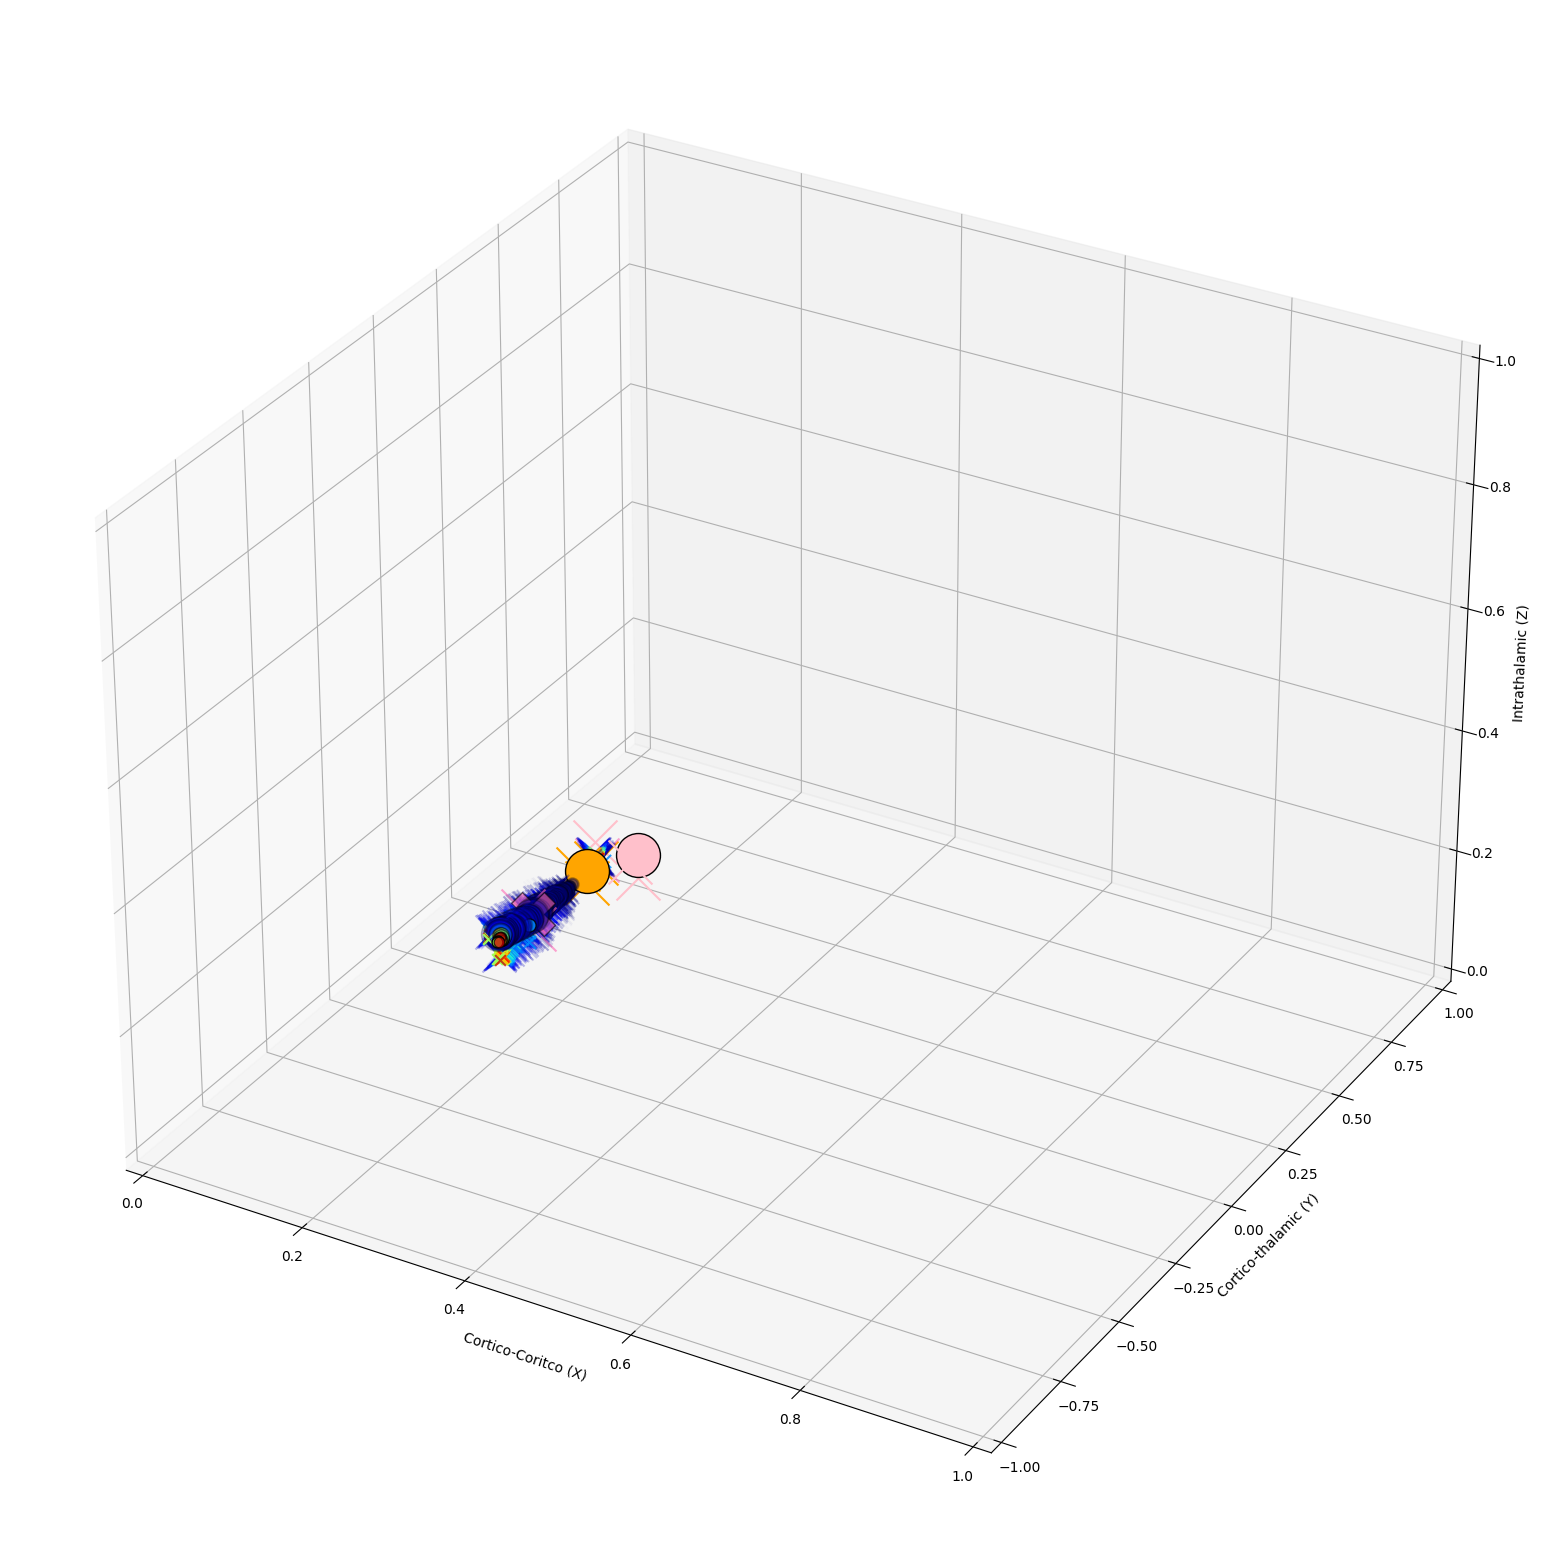

In [274]:
import matplotlib.cm as cm

# Create a 3D scatterplot
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Create a list of colors for each data point based on the cluster number
# colors = [cluster_colors[c] for c in xyz_gains['cluster']]

# Create a 3D scatterplot with colors based on the cluster number
X, Y, Z = xyz_gains['X'], xyz_gains['Y'], xyz_gains['Z']
ppb = xyz_gains['ppb']
osc = xyz_gains['osc']
AUC_delta = xyz_gains['V_AUC_delta']


alpha = np.array([(a - min(AUC_delta)) / (max(AUC_delta) - min(AUC_delta)) for a in AUC_delta])

colormap = cm.get_cmap('jet')
norm_sizes = [(s - min(osc)) / (max(osc) - min(osc)) for s in osc]
colors = [colormap(ns) for ns in norm_sizes]

def scatters(X, Y, Z, s, c, al, edgecolors = 'black', marker = 'o', marker2='x'):
    ax.scatter(X, Y, Z, 
               s=s, 
               c=c,
               edgecolors=edgecolors,
               marker=marker,
               alpha=al)
    
    ax.scatter(X, Y, 0, 
               s=s, 
               c=c,
               edgecolors=edgecolors,
               marker=marker2,
               alpha=al)

    ax.scatter(X, .45, Z, 
               s=s, 
               c=c,
               edgecolors=edgecolors,
               marker=marker2,
               alpha=al)

    ax.scatter(.095, Y, Z, 
               s=s, 
               c=c,
               edgecolors=edgecolors,
               marker=marker2,
               alpha=al)
    
    
for x,y,z,pb,cl, al in zip(X, Y, Z, ppb, colors, alpha):
#     if x, y, z == xyz_gains.loc['eirs-tms-custom_PERM_[bur=3_osc=5.0].output'][['X', 'Y', 'Z']]
#         scatters(x, y, z, 1000, 'hotpink', alpha, marker = 'X')
    scatters(x, y, z, s = pb*30, c = cl, al = al, edgecolors = 'black', marker = 'o')
    

# scatters(X, Y, Z, osc, colors, alpha, edgecolors = 'black')

standard_x, standard_y, standard_z = xyz_gains.loc['eirs-tms-custom_PERM_[bur=3_osc=5.0].output'][['X', 'Y', 'Z']]
scatters(standard_x, standard_y, standard_z, 1000, 'hotpink', al = .6, marker = 'X')

init_x, init_y, init_z = xyz_init[['X', 'Y', 'Z']]
scatters(init_x, init_y, init_z, 1000, 'orange', al = 1, marker = 'o')

alt_x, alt_y, alt_z = o[['X', 'Y', 'Z']][:15].mean()
scatters(alt_x, alt_y, alt_z, 1000, 'pink', al = 1, marker = 'o')


ax.set_xlim(0, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(0, 1)


# Add labels and a colorbar
ax.set_xlabel('Cortico-Coritco (X)')
ax.set_ylabel('Cortico-thalamic (Y)')
ax.set_zlabel('Intrathalamic (Z)')
# ax.set_title('Post-stimulation CT gain in XYZ space\nMarker size denotes extent of alpha AUC suppression (larger = more suppressed)')

# Add a legend
# Create a custom legend based on the cluster_colors dictionary
# unique_clusters = cluster_colors.keys()
# legend_elements = []

# legend_elements.append(Line2D([0], [0], marker='s', color='green', label=f'Pre-stim.', markersize=10))
    

# for cluster in unique_clusters:
#     color = cluster_colors[cluster]
#     legend_elements.append(Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', 
#                                    markerfacecolor=color, markersize=10))
    

# Add the legend
# ax.legend(handles=legend_elements, loc='upper right', title='Clusters')

plt.show()

In [273]:
alt_x, alt_y, alt_z

(0.15105183144855075, 0.4842306527413478, 0.039888982486677604)

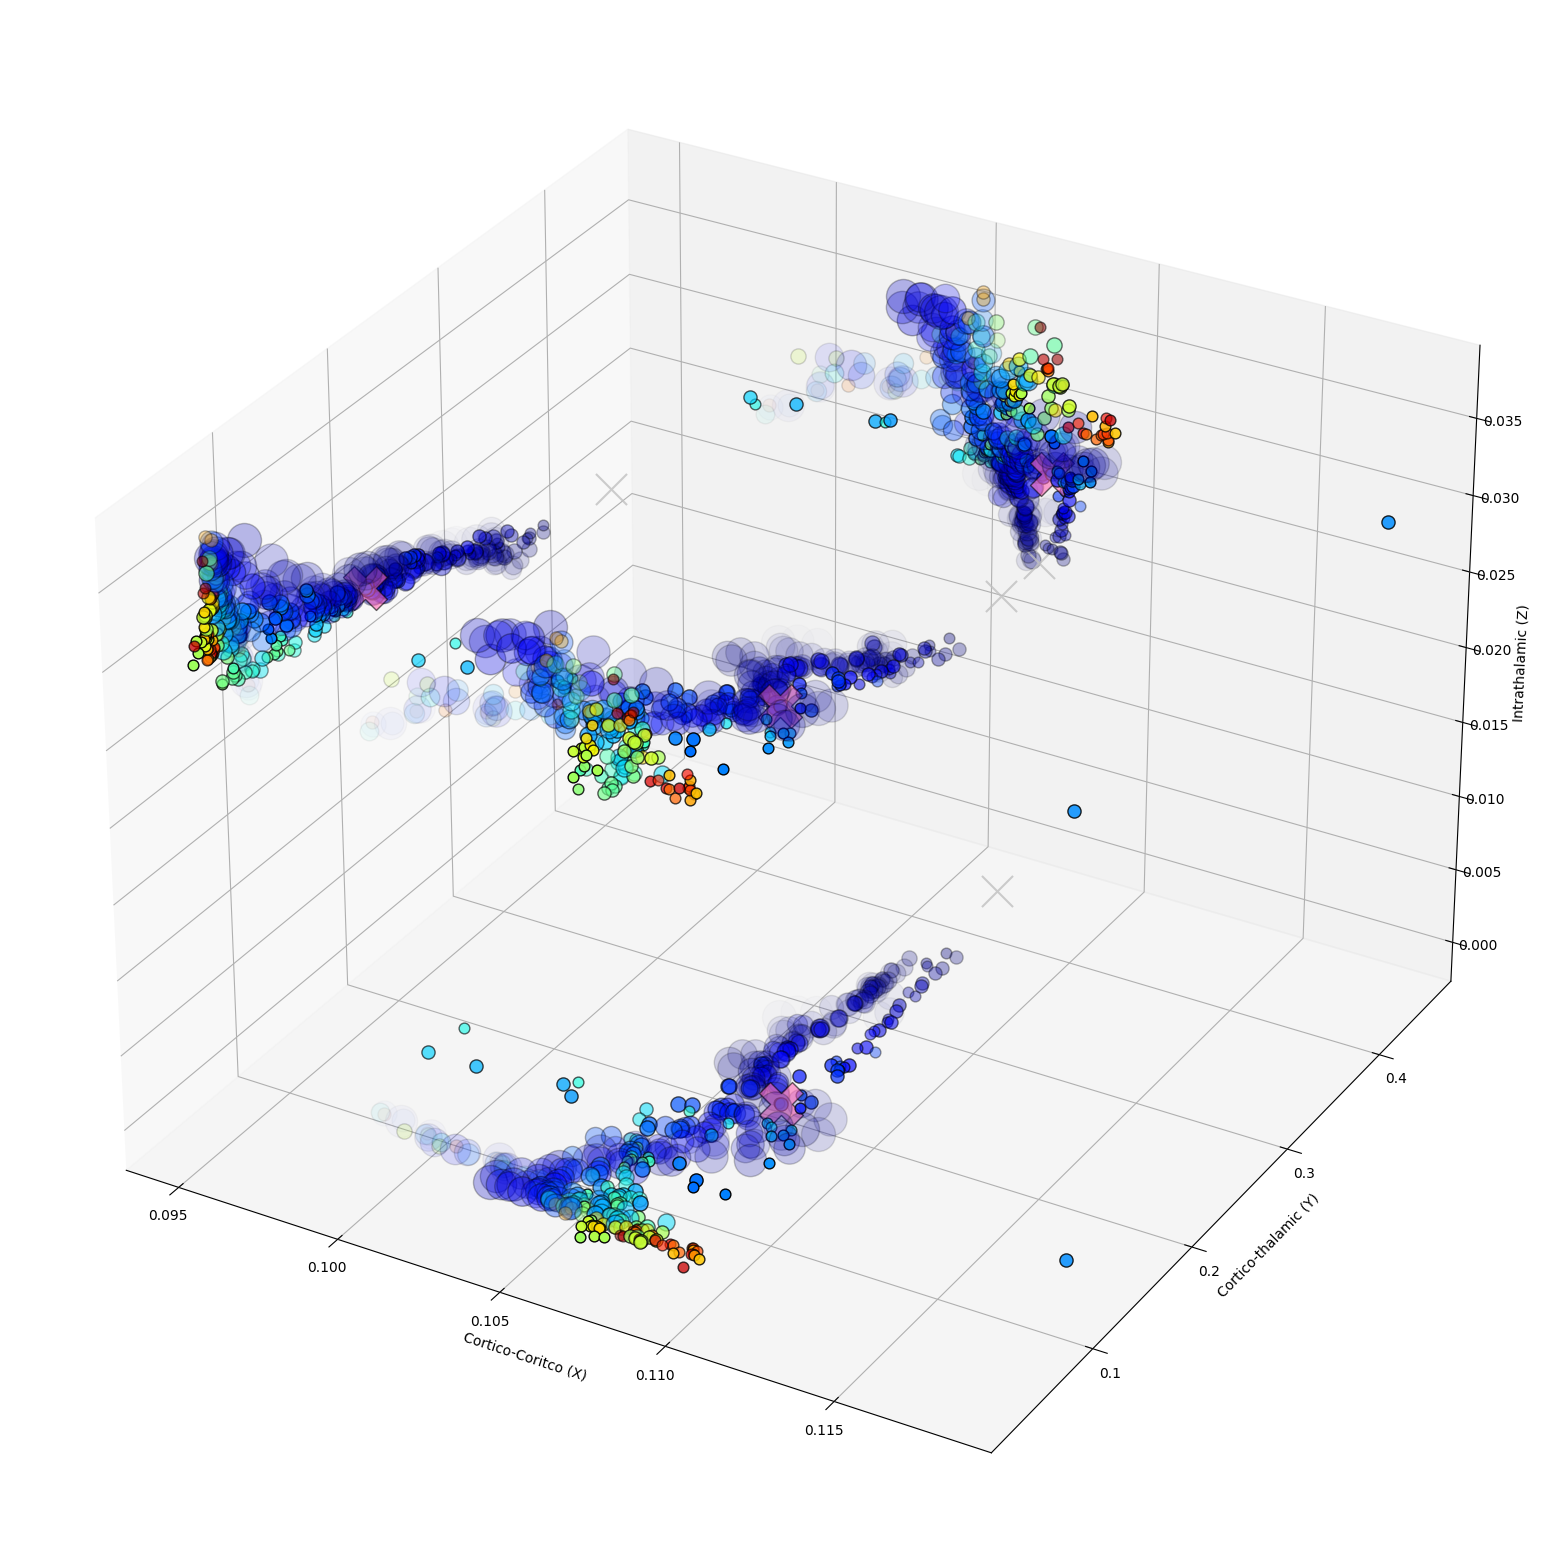

In [31]:
# Create a 3D scatterplot
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Create a list of colors for each data point based on the cluster number
# colors = [cluster_colors[c] for c in xyz_gains['cluster']]

# Create a 3D scatterplot with colors based on the cluster number
X, Y, Z = xyz_gains['X'], xyz_gains['Y'], xyz_gains['Z']
ppb = xyz_gains['ppb']
osc = xyz_gains['osc']
AUC_delta = xyz_gains['V_AUC_delta']


alpha = np.array([(a - min(AUC_delta)) / (max(AUC_delta) - min(AUC_delta)) for a in AUC_delta])

colormap = cm.get_cmap('jet')
norm_sizes = [(s - min(osc)) / (max(osc) - min(osc)) for s in osc]
colors = [colormap(ns) for ns in norm_sizes]

def scatters(X, Y, Z, s, c, al, edgecolors = 'black', marker = 'o'):
    ax.scatter(X, Y, Z, 
               s=s, 
               c=c,
               edgecolors=edgecolors,
               marker=marker,
               alpha=al)
    
    ax.scatter(X, Y, 0, 
               s=s, 
               c=c,
               edgecolors=edgecolors,
               marker=marker,
               alpha=al)

    ax.scatter(X, .45, Z, 
               s=s, 
               c=c,
               edgecolors=edgecolors,
               marker=marker,
               alpha=al)

    ax.scatter(.095, Y, Z, 
               s=s, 
               c=c,
               edgecolors=edgecolors,
               marker=marker,
               alpha=al)
    
    
for x,y,z,pb,cl, al in zip(X, Y, Z, ppb, colors, alpha):
#     if x, y, z == xyz_gains.loc['eirs-tms-custom_PERM_[bur=3_osc=5.0].output'][['X', 'Y', 'Z']]
#         scatters(x, y, z, 1000, 'hotpink', alpha, marker = 'X')
    scatters(x, y, z, s = pb*30, c = cl, al = al, edgecolors = 'black', marker = 'o')
    

# scatters(X, Y, Z, osc, colors, alpha, edgecolors = 'black')

standard_x, standard_y, standard_z = xyz_gains.loc['eirs-tms-custom_PERM_[bur=3_osc=5.0].output'][['X', 'Y', 'Z']]
scatters(standard_x, standard_y, standard_z, 1000, 'hotpink', al = .6, marker = 'X')

init_x, init_y, init_z = xyz_init[['X', 'Y', 'Z']]
scatters(init_x, init_y, init_z, 500, 'silver', al = .8, marker = 'x')





# Add labels and a colorbar
ax.set_xlabel('Cortico-Coritco (X)')
ax.set_ylabel('Cortico-thalamic (Y)')
ax.set_zlabel('Intrathalamic (Z)')
# ax.set_title('Post-stimulation CT gain in XYZ space\nMarker size denotes extent of alpha AUC suppression (larger = more suppressed)')

# Add a legend
# Create a custom legend based on the cluster_colors dictionary
# unique_clusters = cluster_colors.keys()
# legend_elements = []

# legend_elements.append(Line2D([0], [0], marker='s', color='green', label=f'Pre-stim.', markersize=10))
    

# for cluster in unique_clusters:
#     color = cluster_colors[cluster]
#     legend_elements.append(Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', 
#                                    markerfacecolor=color, markersize=10))
    

# Add the legend
# ax.legend(handles=legend_elements, loc='upper right', title='Clusters')

plt.show()

In [ ]:
X    0.151052
Y    0.484231
Z    0.039889

In [8]:
%%time

dot_conf('eirs-tms-custom.conf').run(params = {'Coupling 1': '.001532',
                                               'Coupling 2': '-.009639'}, gains = True)

(67, 'Coupling 1:  BCM - nu: 0.001200 nu_max: 1e-2 Dth: .25e-6 Pth: .45e-6 xyth: 1e-4 x: 2.3e-2 y: 2e-2 B: 30e3 glu_0: 200e-6 gNMDA: 2e-3 t_BCM: 7 t_rec: 1000\n')

(76, 'Coupling 10: BCM - nu: 0.001135 nu_max: 1e-2 Dth: .25e-6 Pth: .45e-6 xyth: 1e-4 x: 2.3e-2 y: 2e-2 B: 30e3 glu_0: 200e-6 gNMDA: 2e-3 t_BCM: 7 t_rec: 1000\n')

(77, 'Coupling 11: BCM - nu:-0.001222 nu_max:-1e-2 Dth: .25e-6 Pth: .45e-6 xyth: 1e-4 x: 2.3e-2 y: 2e-2 B: 30e3 glu_0: 200e-6 gNMDA: 2e-3 t_BCM: 7 t_rec: 1000\n')

(78, 'Coupling 12: Map - nu: 0.008222\n')

4 instances of Coupling 1 after filtering. Select line number: 67


Exception: No instances of 'Coupling 1' on lines containing '' to replace.

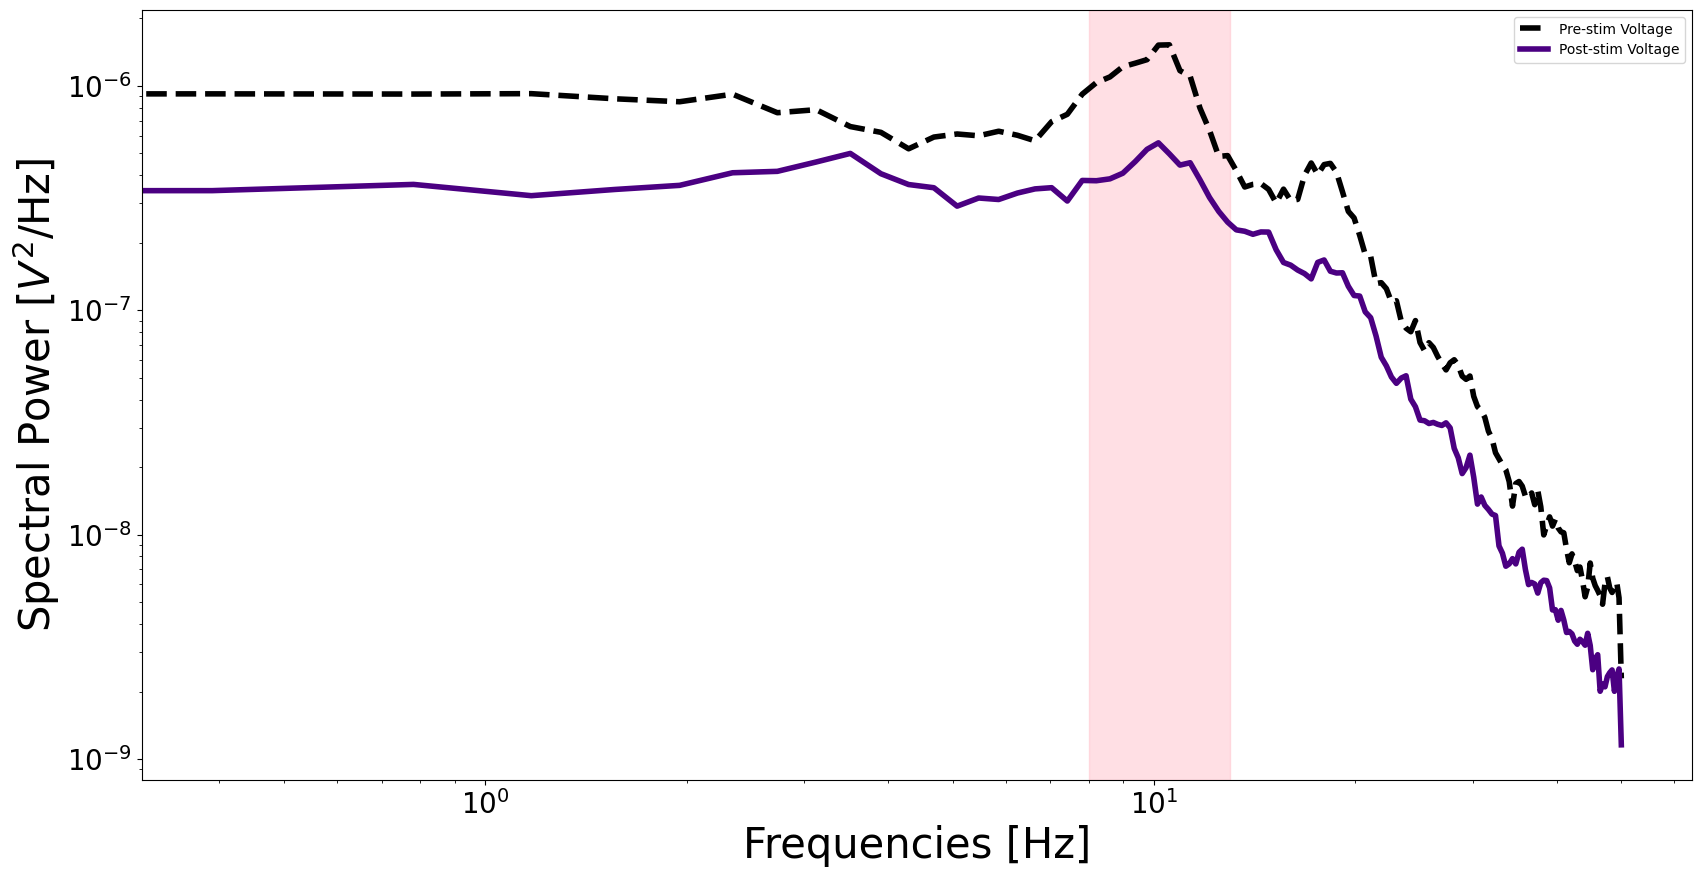

In [11]:
def grab_protocol(ppb, osc):
    
    field = 'propagator.ee.phi'
#     field = 'pop.e.v'
#     field = 'pop.e.q'

    output_dir = '/gpfs/fs0/scratch/j/johngrif/kadak/code/tms-plasticity-modelling-backup/tms-plasticity-modelling/working/outputs/bursts_oscillation/'

    keywords = [f'bur={ppb}', f'osc={osc}']
    f_names_list = list_files(output_dir, extension_filter='.output')
    select_f_name = [string for string in f_names_list if all(keyword in string for keyword in keywords)][0]

    protocol = dot_output(os.path.join(output_dir, select_f_name))
    
    sampling_freq = protocol.sampling_rate
    df = protocol.df()
    
    stim_onset = 150
    stim_duration = 200
    
    pre_signal = df[field].loc[:stim_onset - 5]
    post_signal = df[field].loc[(stim_onset+stim_duration) + 105:]
    
    return [pre_signal, post_signal, sampling_freq]

ppb = 12
osc = 4

pre_signal, post_signal, sampling_freq = grab_protocol(ppb, osc)
graph_PSD_delta(pre_signal, post_signal, sampling_freq)